# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

# **Importar os Dados**

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil, index_col = 'ano')

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [5]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [6]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [7]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [8]:
print(f'O DataFrame possui um total de {df.shape[0]} linhas e {df.shape[1]} colunas.')
df.head() #Verificando as 5 primeiras linhas do DataFrame

O DataFrame possui um total de 303 linhas e 14 colunas.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df.describe() #Analisando medidas de tendência central e dispersão

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [10]:
df.dtypes #Analisando o tipo de valores contidos nas colunas

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [11]:
df.num.value_counts() #1 para há doenças cardíacas e 0 para não há doença cardíaca.

0    164
1    139
Name: num, dtype: int64

In [13]:
df.isnull().sum() #Verificando se há valores nulos no DataFrame

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df_brasil

,mortes_doencas_cardio
ano,
2017,383.961
2016,362.091
2015,349.584
2014,340.284
2013,339.672
2012,333.295
2011,335.213
2010,326.371
2009,320.074


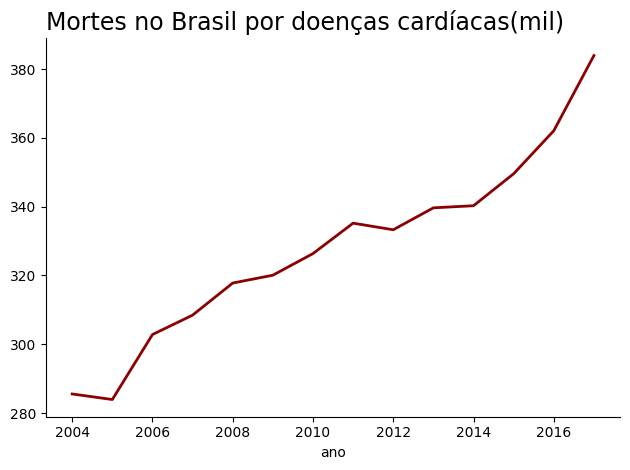

In [14]:
#Mortes no Brasil por doenças cardiovasculares

#Plotando a estrutura gráfica
fig, ax = plt.subplots()
df_brasil.plot(ax = ax, color = 'darkred', linewidth=2)

#Técnicas de uma melhor visualização de dados
ax.set_title('Mortes no Brasil por doenças cardíacas(mil)', fontsize = 17, loc = 'left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_visible(False)

#Mostrar gráfico
plt.tight_layout()

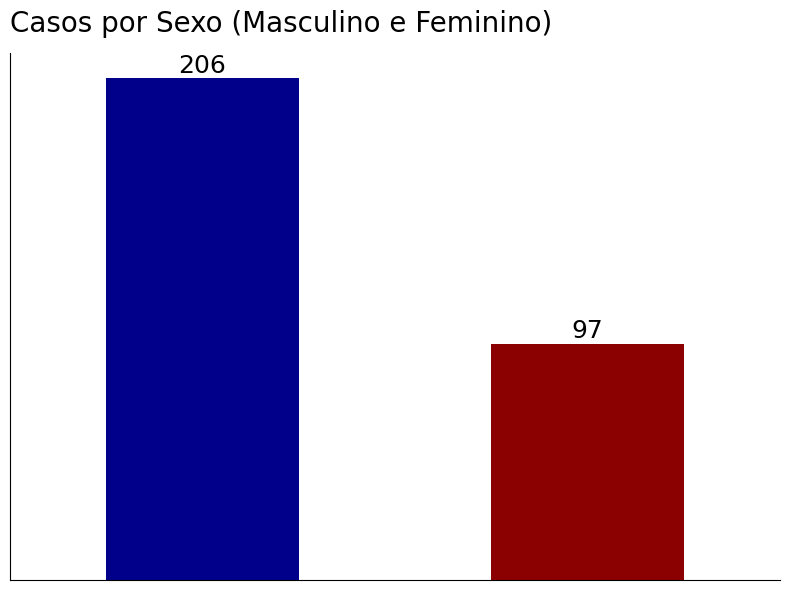

In [15]:
#Contando os valores por sexo
sexo = df.sex.value_counts()

#Plotando a estrutura gráfica
fig, ax = plt.subplots()
sexo.plot(kind = 'bar', ax = ax, color = ['darkblue', 'darkred'], figsize = (8,6),)


#Técnicas de uma melhor visualização de dados
ax.set_title('Casos por Sexo (Masculino e Feminino)', fontsize = 20, loc='left', pad = 15)
ax.bar_label(ax.containers[0], label_type='edge', padding=0.2, fontsize = 18)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Mostrar gráfico
plt.tight_layout()

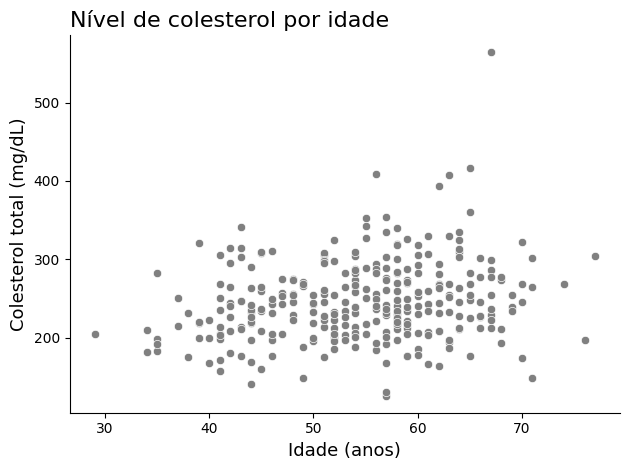

In [16]:
#Gerando a estrutura gráfica inicial
fig, ax = plt.subplots()

#Plotando o gráfico de dispersão
sns.scatterplot(data = df, x = df.age, y = df.chol, ax = ax, color = 'gray')

#Técnicas de uma melhor visualização de dados
ax.set_title('Nível de colesterol por idade', fontsize = 16, loc = 'left')
ax.set_ylabel('Colesterol total (mg/dL)', fontsize = 13)
ax.set_xlabel('Idade (anos)', fontsize = 13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Mostrar gráfico
plt.tight_layout()

In [17]:
df.loc[df.chol > 500] #Verificando o valor mais discrepante em relação aos outros

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0


Text(0.5, 0, 'Colesterol total (mg/dL)')

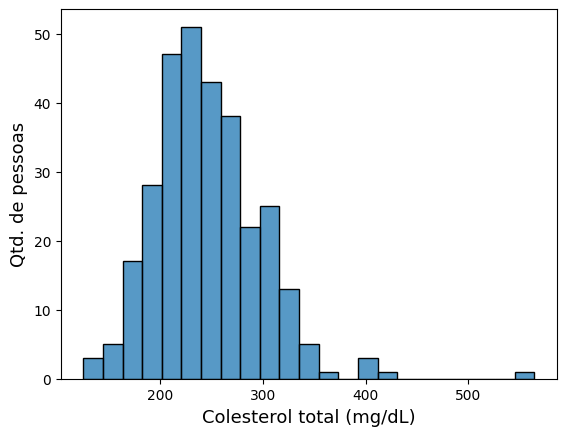

In [18]:
#Gerando a estrutura gráfica inicial
fig, ax = plt.subplots()

#Plotando o histograma da coluna de colesterol
sns.histplot(data = df.chol);

#Entitulando eixo y e eixo x
ax.set_ylabel('Qtd. de pessoas', fontsize = 13);
ax.set_xlabel('Colesterol total (mg/dL)', fontsize = 13)

In [19]:
#Contando a quantidade de tipos de resultados e armazenando em uma estrutura de dicionário
eletrocardiografia = dict(df.restecg.value_counts())

In [20]:
#Vendo as chaves do dicionário
eletrocardiografia.keys()

dict_keys([0.0, 2.0, 1.0])

In [21]:
#Vendo os valores referentes a cada chave(quantas vezes se repetem no DataFrame)
eletrocardiografia.values()

dict_values([151, 148, 4])

In [26]:
#Classificando os resultados
labels = ['Normal','Anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)', 'Hipertrofia ventricular esquerda provável ou definitiva']

#Armazenando os valores em uma variável
sizes = eletrocardiografia.values()

#Separando a fatia maior das outras para um maior destaque
explode = (0.1, 0, 0)

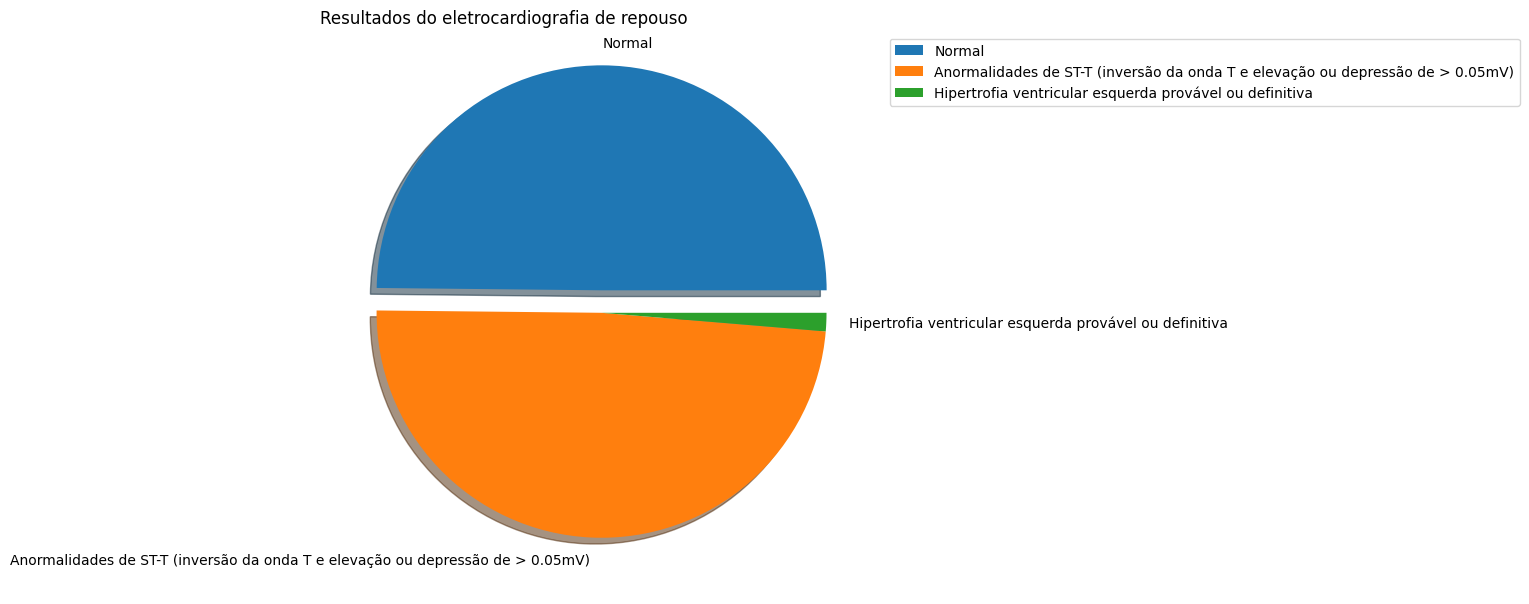

In [27]:
#Gerando a estrutura inicial para o gráfico
fig, ax = plt.subplots(figsize=(12,8))

#Criando o gráfico de pizza
ax.pie(sizes, labels=labels, explode=explode, shadow=True)

#Título e legenda para orientação
ax.set_title("Resultados do eletrocardiografia de repouso", loc = 'left')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

#Mostrando o gráfico
plt.tight_layout()

In [ ]:
df.corr() #Gerando uma matriz de correlação das variáveis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


1: Correlação positiva perfeita - Isso significa que as duas variáveis aumentam juntas em uma proporção linear perfeita. Quando uma variável aumenta, a outra também aumenta na mesma proporção.

0: Ausência de correlação - Isso indica que não há relação linear entre as variáveis. Mudanças em uma variável não estão relacionadas a mudanças na outra variável.

-1: Correlação negativa perfeita - Isso significa que as duas variáveis têm uma relação linear inversa perfeita. Quando uma variável aumenta, a outra diminui na mesma proporção.

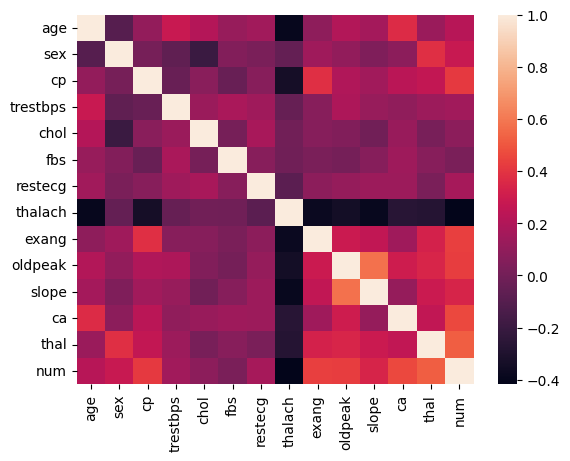

In [24]:
#Plotando a correlação em um heatmap para facilitar a visualização
sns.heatmap(df.corr());

# **Conclusões**



*   Entre 2004 e 2016, as mortes por doenças cardíacas cresceram cerca de 35,7%
*   Mais homens do que mulheres são diagnosticados com doenças cardíacas
*   A maioria das pessoas possui um nível limítrofe ou elevado de colesterol, embora não tenha correlação com a idade. Os níveis ideais geralmente são considerados menos de 200 mg/dL. Níveis entre 200 e 239 mg/dL são considerados limítrofes, enquanto níveis acima de 240 mg/dL são considerados elevados.
*   A maioria dos resultados da eletrocardiografia de repouso apontam como normais. Contudo, grande parte das pessoas possui uma anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)





O objetivo desta análise é apenas para treinar a questão da análise exploratória inicial dos dados, criando visualizações e analisando estatisticamente para uma melhor compreensão do conjunto de dados, que posteriormente poderá ser trabalhado para outras finalidades.